### Assessing Climate data to understand 

Climate change is impacting the way people live around the world






**The DATA DESCRIPTION AND CITATION HERE** 🛎️

#### Study Area: New Delhi
#### New Delhi is the capital of India, and it's also an urban district within the larger city of Delhi.
![alt text](New_Delhi.PNG)

In [1]:
# Import libraries
import holoviews as hv
import hvplot.pandas
import pandas as pd 

In [2]:
NewDelhi_url = ('https://www.ncei.noaa.gov/access/services/data/v1?'
          'dataset=daily-summaries'
          '&dataTypes=PRCP,TAVG,TMAX,TMIN'
          '&stations=IN022021900'
          '&startDate=1901-01-01'
          '&endDate=2025-07-27'
          '&units=standard')
NewDelhi_url 

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP,TAVG,TMAX,TMIN&stations=IN022021900&startDate=1901-01-01&endDate=2025-07-27&units=standard'

### Downloading and working with NCEI Data 

Here we have used earthpy to download data from your API URL.
 

In [3]:
# Download the climate data
New_delhi_df = pd.read_csv(
    NewDelhi_url,
     index_col='DATE',
     parse_dates=True,
     na_values=['NaN']
)

# Check that the download worked
New_delhi_df.head()

,STATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,
1901-01-01,IN022021900,0.31,NaN,NaN,NaN
1901-01-02,IN022021900,0.00,NaN,NaN,NaN
1901-01-03,IN022021900,0.00,NaN,NaN,NaN
1901-01-04,IN022021900,0.00,NaN,NaN,NaN
1901-01-05,IN022021900,0.00,NaN,NaN,NaN


In [4]:
New_delhi_df = New_delhi_df[['PRCP', 'TAVG','TMAX','TMIN']]
New_delhi_df

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1901-01-01,0.31,NaN,NaN,NaN
1901-01-02,0.00,NaN,NaN,NaN
1901-01-03,0.00,NaN,NaN,NaN
1901-01-04,0.00,NaN,NaN,NaN
1901-01-05,0.00,NaN,NaN,NaN
...,...,...,...,...
2025-07-23,NaN,83.0,91.0,78.0
2025-07-24,NaN,89.0,NaN,77.0
2025-07-25,NaN,91.0,NaN,82.0


### Data Subsetting


In [5]:
# Subset the data 1975 - 2025
ND_1975_2025 = New_delhi_df['1975':'2025']
ND_1975_2025

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1975-01-01,0.63,52.0,55.0,NaN
1975-01-02,0.02,53.0,63.0,43.0
1975-01-03,0.00,52.0,64.0,45.0
1975-01-04,0.00,54.0,66.0,43.0
1975-01-05,0.00,53.0,68.0,43.0
...,...,...,...,...
2025-07-23,NaN,83.0,91.0,78.0
2025-07-24,NaN,89.0,NaN,77.0
2025-07-25,NaN,91.0,NaN,82.0


### Ploting the precpitation column (PRCP) vs time

<Axes: title={'center': 'NEW Delhi-Precipitation'}, xlabel='Date ', ylabel='Precipitation in (mm)'>

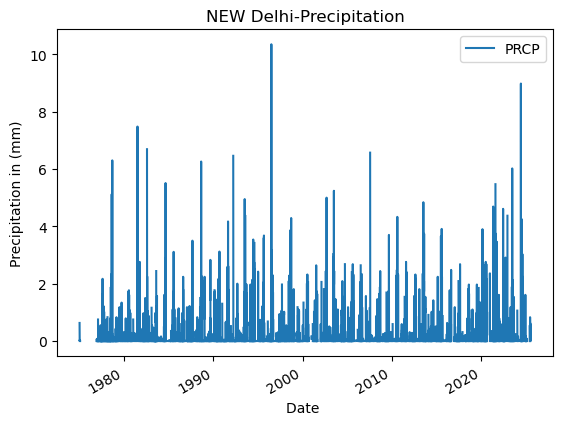

In [6]:
ND_1975_2025.plot(
    y='PRCP',
    title='NEW Delhi-Precipitation',
    xlabel='Date ',
    ylabel='Precipitation in (mm)')

Plotting Average Temperature vs Time

<Axes: title={'center': 'NEW Delhi Average Temperature'}, xlabel='Date ', ylabel='Temperature in (Degree Farheinhite)'>

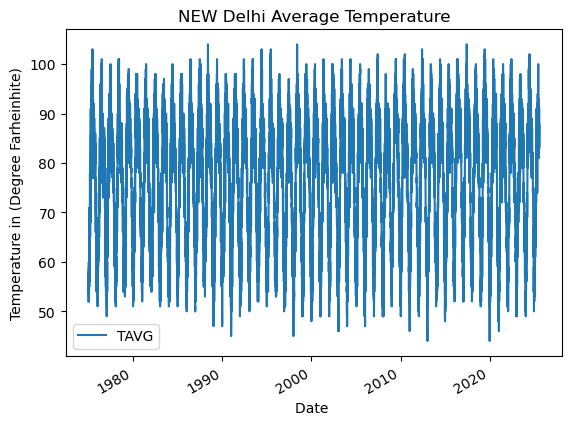

In [7]:
# Plot the temperature vs time
ND_1975_2025.plot(
    y='TAVG',
    title='NEW Delhi Average Temperature',
    xlabel='Date ',
    ylabel='Temperature in (Degree Farheinhite)'
)

In [8]:
# Write a function to convert Fahrenheit to Celsius
def fah_to_cel(fah):
    """Convert temperature to Celcius"""
    return (fah-32)*5/9 # Put your equation in here

ND_1975_2025['Celcius'] = ND_1975_2025['TAVG'].apply(fah_to_cel)
ND_1975_2025

/tmp/ipykernel_1032/3902032077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ND_1975_2025['Celcius'] = ND_1975_2025['TAVG'].apply(fah_to_cel)


,PRCP,TAVG,TMAX,TMIN,Celcius
DATE,,,,,
1975-01-01,0.63,52.0,55.0,NaN,11.111111
1975-01-02,0.02,53.0,63.0,43.0,11.666667
1975-01-03,0.00,52.0,64.0,45.0,11.111111
1975-01-04,0.00,54.0,66.0,43.0,12.222222
1975-01-05,0.00,53.0,68.0,43.0,11.666667
...,...,...,...,...,...
2025-07-23,NaN,83.0,91.0,78.0,28.333333
2025-07-24,NaN,89.0,NaN,77.0,31.666667
2025-07-25,NaN,91.0,NaN,82.0,32.777778


In [9]:
# Write a function to convert Fahrenheit to Celsius
def fah_to_cel(fah):
    """Convert temperature to Celcius"""
    return (fah-32)*5/9 # Put your equation in here

ND_1975_2025['Celcius_TMAX'] = ND_1975_2025['TMAX'].apply(fah_to_cel)
ND_1975_2025

/tmp/ipykernel_1032/1610806823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ND_1975_2025['Celcius_TMAX'] = ND_1975_2025['TMAX'].apply(fah_to_cel)


,PRCP,TAVG,TMAX,TMIN,Celcius,Celcius_TMAX
DATE,,,,,,
1975-01-01,0.63,52.0,55.0,NaN,11.111111,12.777778
1975-01-02,0.02,53.0,63.0,43.0,11.666667,17.222222
1975-01-03,0.00,52.0,64.0,45.0,11.111111,17.777778
1975-01-04,0.00,54.0,66.0,43.0,12.222222,18.888889
1975-01-05,0.00,53.0,68.0,43.0,11.666667,20.000000
...,...,...,...,...,...,...
2025-07-23,NaN,83.0,91.0,78.0,28.333333,32.777778
2025-07-24,NaN,89.0,NaN,77.0,31.666667,NaN
2025-07-25,NaN,91.0,NaN,82.0,32.777778,NaN


In [10]:
# Resample the data to look at yearly mean values
ND_1975_2025_mean = ND_1975_2025.resample('Y-Jul').mean()
ND_1975_2025_mean

/tmp/ipykernel_1032/1138109287.py:2: FutureWarning: 'Y-Jul' is deprecated and will be removed in a future version, please use 'YE-JUL' instead.
  ND_1975_2025_mean = ND_1975_2025.resample('Y-Jul').mean()


,PRCP,TAVG,TMAX,TMIN,Celcius,Celcius_TMAX
DATE,,,,,,
1975-07-31,0.031364,78.213270,87.983784,66.424419,25.674039,31.102102
1976-07-31,NaN,75.941667,86.789474,65.169960,24.412037,30.438596
1977-07-31,0.075771,76.384615,87.232198,67.097701,24.658120,30.684555
1978-07-31,0.068562,76.860274,87.099099,66.226766,24.922374,30.610611
1979-07-31,0.112605,76.413699,87.763533,66.515152,24.674277,30.979740
1980-07-31,0.061532,77.773224,89.571831,66.175325,25.429569,31.984351
1981-07-31,0.066817,77.227397,88.274238,65.944954,25.126332,31.263466
1982-07-31,0.079267,75.597260,86.843575,64.944984,24.220700,30.468653
1983-07-31,0.043962,75.591781,86.807910,64.770898,24.217656,30.448839


Plot resampled data 📈

In [11]:
# Plot mean annual temperature values
# using hvplot
import hvplot.pandas
(ND_1975_2025.hvplot(
    y='Celcius',
    title='NEW Delhi Mean Annual Temperature',
    xlabel='DATE',
    ylabel='Temperature in (C)')
+
ND_1975_2025_mean.hvplot(
    y='Celcius',
    title='New Delhi Mean Annual Temperature',
    xlabel='DATE',
    ylabel='Temperature in (C)',shared_axes=False)).cols(1)

:Layout
   .Curve.I  :Curve   [DATE]   (Celcius)
   .Curve.II :Curve   [DATE]   (Celcius)

In [12]:
# Plot Annual Max temperature values
# using hvplot
import hvplot.pandas
(ND_1975_2025.hvplot(
    y='Celcius_TMAX',
    title='New Delhi Annual Maximum Temperature',
    xlabel='DATE',
    ylabel='Temperature in (C)')
+
ND_1975_2025_mean.hvplot(
    y='Celcius_TMAX',
    title='New Delhi Annual Maximum Temperature',
    xlabel='DATE',
    ylabel='Temperature in (C)',shared_axes=False)).cols(1)

:Layout
   .Curve.I  :Curve   [DATE]   (Celcius_TMAX)
   .Curve.II :Curve   [DATE]   (Celcius_TMAX)

In [28]:
ND_1975_2025_mon_mean = ND_1975_2025.groupby('month')['JAN'].mean().reset_index()
ND_1975_2025_mon_mean

KeyError: 'month'

In [15]:
# Resample the data to look at yearly mean values
ND_1975_2025_mon_mean = ND_1975_2025.resample('M').mean()
ND_1975_2025_mon_mean

/tmp/ipykernel_1032/2900181872.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ND_1975_2025_mon_mean = ND_1975_2025.resample('M').mean()


,PRCP,TAVG,TMAX,TMIN,Celcius,Celcius_TMAX
DATE,,,,,,
1975-01-31,0.031364,55.967742,66.310345,44.500000,13.315412,19.061303
1975-02-28,NaN,61.642857,73.653846,48.333333,16.468254,23.141026
1975-03-31,NaN,73.322581,85.214286,59.592593,22.956989,29.563492
1975-04-30,NaN,86.600000,98.689655,73.038462,30.333333,37.049808
1975-05-31,NaN,94.066667,104.625000,81.600000,34.481481,40.347222
...,...,...,...,...,...,...
2025-03-31,0.026667,74.580645,90.923077,59.625000,23.655914,32.735043
2025-04-30,0.000000,86.500000,103.350000,70.576923,30.277778,39.638889
2025-05-31,0.000000,88.096774,101.941176,77.041667,31.164875,38.856209


In [18]:
ND_1975_2025_mon_mean = ND_1975_2025_mon_mean.reset_index()
ND_1975_2025_mon_mean

,index,DATE,PRCP,TAVG,TMAX,TMIN,Celcius,Celcius_TMAX
0,0,1975-01-31,0.031364,55.967742,66.310345,44.500000,13.315412,19.061303
1,1,1975-02-28,NaN,61.642857,73.653846,48.333333,16.468254,23.141026
2,2,1975-03-31,NaN,73.322581,85.214286,59.592593,22.956989,29.563492
3,3,1975-04-30,NaN,86.600000,98.689655,73.038462,30.333333,37.049808
4,4,1975-05-31,NaN,94.066667,104.625000,81.600000,34.481481,40.347222
...,...,...,...,...,...,...,...,...
602,602,2025-03-31,0.026667,74.580645,90.923077,59.625000,23.655914,32.735043
603,603,2025-04-30,0.000000,86.500000,103.350000,70.576923,30.277778,39.638889
604,604,2025-05-31,0.000000,88.096774,101.941176,77.041667,31.164875,38.856209
605,605,2025-06-30,0.275000,89.933333,100.611111,81.291667,32.185185,38.117284


### Storing variables 

In [14]:
%store ND_1975_2025 ND_1975_2025_mean NewDelhi_url New_delhi_df

Stored 'ND_1975_2025' (DataFrame)
Stored 'ND_1975_2025_mean' (DataFrame)
Stored 'NewDelhi_url' (str)
Stored 'New_delhi_df' (DataFrame)


In [19]:
%%capture
%%bash
#Coverting to HTML
jupyter nbconvert climate-98-download.ipynb --to html

Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!